In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [42]:
class KNN:
    def __init__(self, X_train, y_train, k_neighbors=3, p=2):
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量(p-范数)
                   1——曼哈顿距离
                   2——欧几里得距离
                   np.inf——切比雪夫距离
        """
        self.k = k_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, data):
        knn_list = []
        
        # 初始化k数组
        for i in range(self.k):
            dist = np.linalg.norm(data-self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))
        
        # 找k近邻
        for i in range(self.k, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(data-self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])
        
        # 统计
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs.items(), key=lambda x: x[1])[-1][0]

        return max_count

    def score(self, data, traget):
        right_count = 0

        for X,y in zip(data, traget):
            label = self.predict(X)
            if label == y:
                right_count += 1
        
        return right_count/len(data) 

In [43]:
iris = load_iris()
data, target = iris.data[:100, [0,1]], iris.target[:100]
data.shape, target.shape

((100, 2), (100,))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [45]:
knn = KNN(X_train, y_train)

In [46]:
knn.score(X_test, y_test)

1.0

In [48]:
test_point = [5, 2.7]
print('Test Point: {}'.format(knn.predict(test_point)))

Test Point: 1


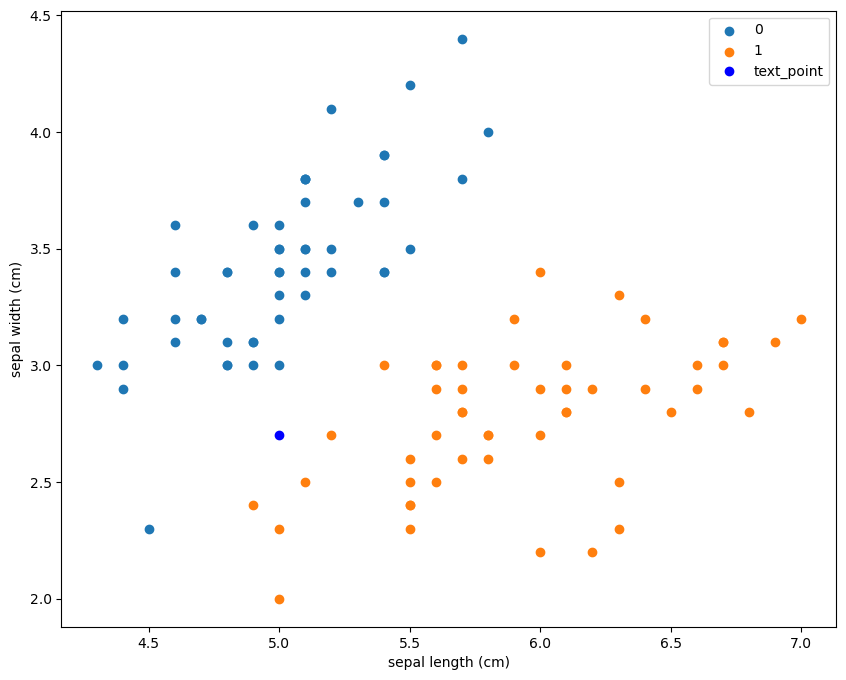

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(data[:50,0], data[:50,1], label='0')
plt.scatter(data[50:100,0], data[50:100,1], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='text_point')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()    